In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Train Data

In [2]:
train_context_path = '../dataset/train.context'
train_question_path = '../dataset/train.question'
train_answer_path = '../dataset/train.answer'
train_answer_span_path = '../dataset/train.span'

lines_context = open(train_context_path, encoding = 'utf-8').readlines() 
lines_question = open(train_question_path, encoding = 'utf-8').readlines()
lines_answer = open(train_answer_path, encoding = 'utf-8').readlines()
lines_answer_span = open(train_answer_span_path, encoding = 'utf-8').readlines()  

#### Number of Training Samples

In [3]:
print(len(lines_context), len(lines_question), len(lines_answer), len(lines_answer_span))

57163 57163 57163 57163


#### Context Length

(array([1.8030e+03, 3.4560e+03, 8.1660e+03, 1.6471e+04, 1.0659e+04,
        7.2190e+03, 4.0060e+03, 2.2650e+03, 1.4060e+03, 8.0600e+02,
        3.6700e+02, 2.0700e+02, 1.6700e+02, 7.5000e+01, 2.6000e+01,
        1.9000e+01, 6.0000e+00, 2.1000e+01, 0.0000e+00, 8.0000e+00,
        5.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00]),
 array([ 22. ,  46.8,  71.6,  96.4, 121.2, 146. , 170.8, 195.6, 220.4,
        245.2, 270. , 294.8, 319.6, 344.4, 369.2, 394. , 418.8, 443.6,
        468.4, 493.2, 518. , 542.8, 567.6, 592.4, 617.2, 642. , 666.8,
        691.6, 716.4, 741.2, 766. ]),
 <a list of 30 Patch objects>)

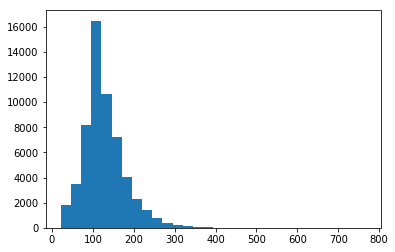

In [4]:
words_context = [x.strip().split() for x in lines_context]
len_context = [len(x) for x in words_context]
plt.hist(len_context, bins = 30)

In [5]:
print(sum(len_context)/len(len_context), min(len_context), max(len_context))

128.38902786767665 22 766


In [6]:
context_array = np.array(len_context)
print("75th percentile:   ", np.percentile(context_array, 75))
print("95th percentile:   ", np.percentile(context_array, 95))
print("99th percentile:   ", np.percentile(context_array, 99))

75th percentile:    152.0
95th percentile:    224.0
99th percentile:    291.0


#### Character Analysis

In [7]:
all_words = sum(words_context[:1000], [])
str1 = ''.join(all_words)
chars = sorted(set(str1))
print(chars)

['!', '$', '%', '&', "'", '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '>', '?', '[', ']', '^', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '~', '£', '¥', '°', '²', '´', '·', '½', '×', 'ß', 'à', 'á', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ì', 'í', 'î', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', 'ú', 'ü', 'ā', 'č', 'ġ', 'ī', 'ı', 'ļ', 'ł', 'ń', 'ō', 'œ', 'ś', 'ş', 'š', 'ū', 'ź', 'ż', 'ǎ', 'ǐ', 'ǔ', 'ɐ', 'ɑ', 'ə', 'ɛ', 'ɜ', 'ɡ', 'ɣ', 'ɪ', 'ɫ', 'ɾ', 'ʁ', 'ʃ', 'ʊ', 'ʒ', 'ʻ', 'ʼ', 'ʾ', 'ˈ', 'ː', '̇', '̧', '̯', 'ά', 'έ', 'ί', 'α', 'β', 'γ', 'δ', 'ε', 'η', 'θ', 'ι', 'κ', 'λ', 'μ', 'ν', 'ο', 'π', 'ρ', 'ς', 'τ', 'υ', 'φ', 'χ', 'ω', 'ό', 'а', 'б', 'и', 'й', 'к', 'л', 'н', 'п', 'с', 'т', 'у', 'ь', 'ا', 'ة', 'د', 'ر', 'س', 'ص', 'م', 'َ', 'ِ', 'ಕ', 'ಚ', 'ಜ', 'ಪ', 'ಮ', 'ಯ', 'ರ', 'ಲ', 'ಶ', 'ಸ', 'ಾ', 'ಿ', 'ು', '್', 'ḍ', 'ḥ', 'ṃ', 'ṅ', 'ṇ', 'ṣ', 'ἀ', 'ἄ', 'ἑ', 'ἰ', 'ὶ', 'ὸ', 'ῖ',

In [9]:
unique_chars = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '[', ']', '^', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '~',]
print(len(unique_chars))

60


#### Question Length

In [ ]:
words_question = [x.strip().split() for x in lines_question]
len_question = [len(x) for x in words_question]
plt.hist(len_question, bins = 30)

In [ ]:
print(sum(len_question)/len(len_question), min(len_question), max(len_question))

In [ ]:
context_array = np.array(len_context)
print("75th percentile:   ", np.percentile(context_array, 75))
print("95th percentile:   ", np.percentile(context_array, 95))
print("99th percentile:   ", np.percentile(context_array, 99))

#### Answer Length

In [ ]:
words_answer = [x.strip().split() for x in lines_answer]
len_answer = [len(x) for x in words_answer]
plt.hist(len_answer, bins= 30)

In [ ]:
print(sum(len_answer)/len(len_answer),min(len_answer), max(len_answer))

In [ ]:
context_array = np.array(len_context)
print("75th percentile:   ", np.percentile(context_array, 75))
print("95th percentile:   ", np.percentile(context_array, 95))
print("99th percentile:   ", np.percentile(context_array, 99))

#### Question Categorisation

In [ ]:
question_type = [x[0] for x in words_question]

In [ ]:
question_type_freq = {}
for t in question_type:
    if t in question_type_freq:
        question_type_freq[t] = question_type_freq[t] + 1
    else:
        question_type_freq[t] = 1

In [ ]:
len(question_type_freq)

In [ ]:
print(list(sorted(question_type_freq, key= question_type_freq.get, reverse = True))[:10])